Questions on This Model

1. The first thing before anything else is creating a control run. Should that control run have a starting point of sigma_0 0.9? And what should I choose for temperature and salinity?
2. I think I have some confusion on teval. For t_eval, I have tmax*100, which saves only 100 timepoints per year-I think it's not enough? I should save it at least every day? 
3. For the trajectories that go into the rare event algorithm, should they be cut after the transient, or should they start from the beginning run, same question for computing mean, variance, std dev?
4. When calculating the probability of a rare event, (to put in the average return time), I'm using 3 standard deviations above the mean. I guess for AMOC, it should be 3 standard deviations below. Is that calculated from the control run?
5. With autocorrelation function, you stop the analysis as it decays to 0? And for the integral of the AC as well?
6. When you split the run into blocks of time, you use the resampling time/integral autocorrelation time to get the number of blocks you should split it into. This isn't an even number, so if I round down and there's a bit of data left, is it fine to cut it, or should I try to get an even number of blocks?
7. Just to confirm, k is computed based on average return time, and tau/resampling time are approximately equal to the integral autocorrelation time.
8. In order to stop and resample, I have to integrate the rare event algorithm with the code for the Gottwald model. To do that I guess I set tmax to the resampling time, and have the initial variables as inputs. I use values based on analysis of AMOC (time average and resampling time), but when I set the values in the clones i should perturb either salinity or temperature, which one?

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
amoc = pd.read_csv('amoc_1000_years.csv')
control = pd.read_csv('control_run.csv')

In [4]:
amoc.head()

Temperature  Salinity  time      AMOC
0          0.5       0.5  0.00  0.000000
1          0.5       0.5  0.01  0.005357
2          0.5       0.5  0.02  0.010352
3          0.5       0.5  0.03  0.014068
4          0.5       0.5  0.04  0.017433

In [42]:
#get label for T and S pairs
amoc['Trajectory'] = amoc.apply(lambda row: f"T={row['Temperature']}, S={row['Salinity']}", axis=1)

#drop rows where timepoint is low
amoc_dropped = amoc.loc[amoc['time']>=10]
amoc_dropped.head()

Temperature  Salinity     time      AMOC    Trajectory
1000          0.5       0.5  10.0001  0.159379  T=0.5, S=0.5
1001          0.5       0.5  10.0101  0.161165  T=0.5, S=0.5
1002          0.5       0.5  10.0201  0.159596  T=0.5, S=0.5
1003          0.5       0.5  10.0301  0.158735  T=0.5, S=0.5
1004          0.5       0.5  10.0401  0.156663  T=0.5, S=0.5

Text(0.5, 1.0, 'AMOC Index Over Time for 4 Starting Points')

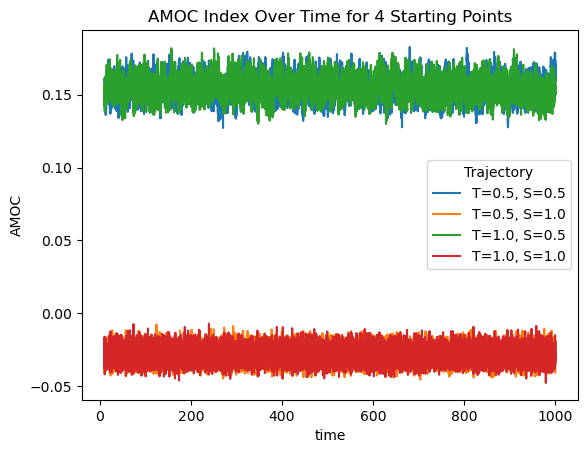

In [43]:
plt.figure()
sns.lineplot(data=amoc_dropped,x='time',y='AMOC', hue='Trajectory')
plt.title("AMOC Index Over Time for 4 Starting Points")

In [78]:
#find mean and standard deviation for Amoc index

#filter dfs to two different attractors
amoc_on = amoc_dropped.loc[amoc_dropped['AMOC']>=0.05]
amoc_off = amoc_dropped.loc[amoc_dropped['AMOC']<0.05]

#filter dfs to only one trajectory (will change this later when we make it a function)
on_trajone = amoc_on.loc[amoc_on['Trajectory']=='T=0.5, S=0.5']
print(len(on_trajone))

#put amoc values in arrays for handling
on_array = on_trajone['AMOC'].tolist()
off_array = amoc_off['AMOC'].tolist()

#find mean and standard deviation
on_mean = np.mean(on_array)
off_mean = np.mean(off_array)
on_std_dev = np.std(on_array)
off_std_dev = np.std(off_array)

#do 3 std dev above mean, should be - not +
threshold_on = on_mean + 3*on_std_dev
threshold_off = off_mean + 3*off_std_dev
print(threshold_on,threshold_off)

99000
0.17548220067063935 -0.014318795045701788


In [ ]:
#return time function - calculate return time for all possible values of a, then graph
delta_t=0.01
#drop transient
control_dropped = control.loc[amoc['time']>=10]
#arrange from smallest to largest values
control_list = sorted(control_dropped['AMOC'].tolist())
#find probability of each event from min to max
value_counter=0
probability_all=[]
for i in range(len(control_list)):
    #print(control_list[i])
    for value in control_list:
        if control_list[i]>value:
            value_counter+=1
    print(i,'th value: ',control_list[i],' greater than ',value_counter,' values.')
    #avoid division by zero
    if (value_counter==0):
        probability_a = 0
        return_time = 0
    else:
        probability_a = value_counter/(len(list))
        #divided by delta_t
        return_time = delta_t/probability_a
    #reset value counter
    value_counter=0
    #save the probabilities
    probability_all.append(return_time)

0 th value:  0.1271984060379355  greater than  0  values.
1 th value:  0.1274263405811359  greater than  1  values.
2 th value:  0.1274626797240176  greater than  2  values.
3 th value:  0.1275402793697398  greater than  3  values.
4 th value:  0.1277213996750689  greater than  4  values.
5 th value:  0.1278369561530374  greater than  5  values.
6 th value:  0.1280122526372172  greater than  6  values.
7 th value:  0.1282116957735601  greater than  7  values.
8 th value:  0.1285002912387611  greater than  8  values.
9 th value:  0.1285444587994932  greater than  9  values.
10 th value:  0.1293057373244314  greater than  10  values.
11 th value:  0.1293334235441552  greater than  11  values.
12 th value:  0.1295008283452129  greater than  12  values.
13 th value:  0.1295829162707553  greater than  13  values.
14 th value:  0.1295875194141705  greater than  14  values.
15 th value:  0.129598768408876  greater than  15  values.
16 th value:  0.1298885055491563  greater than  16  values.
1

In [37]:
#return time function - calculate return time for all possible values of a, then graph
delta_t=0.01
#arrange from smallest to largest values
list = [5.33232,10.1334,5.35234,10.1334,5.82342,10.23852]
sorted_list = sorted(list)
#find probability of each event from min to max
value_counter=0
probability_all=[]
for i in range(len(list)):
    #0.01
    #print(control_list[i])
    value_counter=i
    print('value: ',value,'value counter: ',value_counter)
    #avoid division by zero
    if (value_counter==0):
        probability_a = 0
        return_time = 0
    else:
        probability_a = value_counter/(len(list))
        #divided by delta_t
        return_time = delta_t/probability_a
    #reset value counter
    value_counter=0
    #save the probabilities
    probability_all.append(return_time)

print(probability_all)

value:  10 value counter:  0
List[i]:  10 greater than value:  5
List[i]:  10 greater than value:  5
List[i]:  10 greater than value:  5
value:  10 value counter:  3
value:  10 value counter:  0
List[i]:  10 greater than value:  5
List[i]:  10 greater than value:  5
List[i]:  10 greater than value:  5
value:  10 value counter:  3
value:  10 value counter:  0
List[i]:  10 greater than value:  5
List[i]:  10 greater than value:  5
List[i]:  10 greater than value:  5
value:  10 value counter:  3
[0, 0.02, 0, 0.02, 0, 0.02]


In [32]:
print(1/len(list))
print(delta_t/0.1)

0.1
0.09999999999999999


t         T         S   S0   T0      AMOC  return times
27033  270.332677  0.569699  0.442501  0.5  0.5  0.127198      0.010000
89591  895.918870  0.574094  0.446668  0.5  0.5  0.127426      0.005000
66335  663.356568  0.575513  0.448050  0.5  0.5  0.127463      0.003333
27032  270.322676  0.569371  0.441830  0.5  0.5  0.127540      0.002500
27034  270.342677  0.570667  0.442946  0.5  0.5  0.127721      0.002000

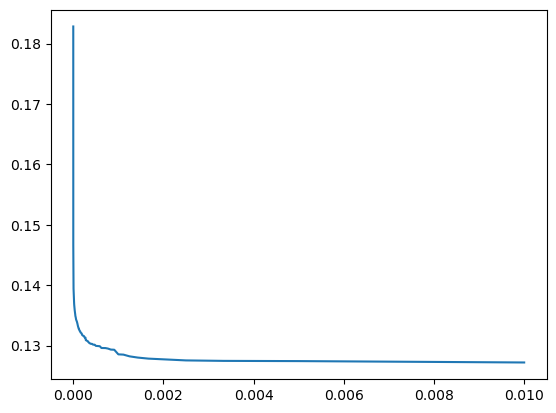

In [23]:
#graphing
control_sorted = control_dropped.sort_values(by=['AMOC'])
control_sorted['return times'] = probability_all

In [ ]:
plt.figure()
plt.plot('return times','AMOC',data=control_sorted)
control_sorted.head()

In [96]:
#Subtract 𝜇2 and divide by 𝜎2
on_variance = on_std_dev**2
auto_corrs = []
auto_corrs_with_negative = []
#auto-correlation function
#Multiply each 𝑋[𝑖] by 𝑋[𝑖+ℓ] for all valid 𝑖
product=0
sum=0
expectation=0
for lag in range(len(on_array)):
    for value in range(len(on_array)-lag):
        #print('value ',on_array[value])
        #print('value: ',value,' value of on array: ',on_array[value],'value + lag: ',value+lag,'value+lag of on array: ',on_array[value + lag])
        product = on_array[value]*on_array[value+lag]
        #print('product ',product)
        sum=sum+product
        #print('sum ',sum)
    #Take the average (sum over all 𝑖 divided by number of terms = 𝑁−ℓ)
    expectation=sum/(len(on_array)-lag)
    sum=0
    auto_correlation = (expectation-on_mean**2)/on_variance
    #print('Auto-correlation:',auto_correlation)
    if (auto_correlation<0):
        break
    auto_corrs.append(auto_correlation)
    #print(lag)

#print(expectation)

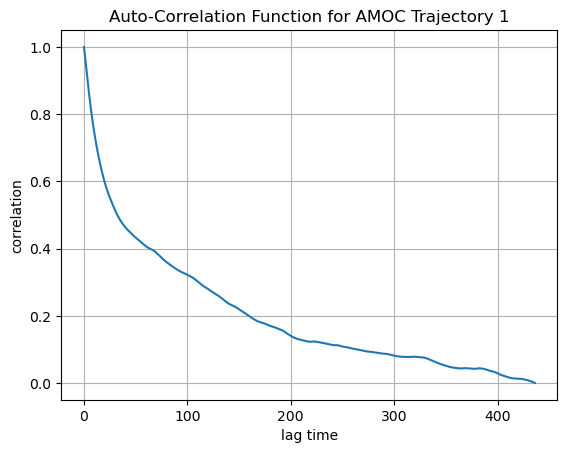

In [97]:
#plot autocorrelation function
plt.figure()
plt.plot(auto_corrs)
plt.title('Auto-Correlation Function for AMOC Trajectory 1')
plt.xlabel('lag time')
plt.ylabel('correlation')
plt.grid()

In [111]:
#integral auto-correlation time (system memory), tau
delta_t = 0.01
mults=[]
for auto in range(len(auto_corrs)):
    mults.append(auto_corrs[auto]*delta_t)
int_ac = np.sum(mults)
print(int_ac)

0.8899593827758487


In [113]:
#average return time, this gives k
return_time = delta_t/probability_a
print(return_time)

5.9638554216867465


In [123]:
#number of timepoints in each resampling block - ntblocks
print(len(on_array))
nt_blocks = int_ac/delta_t
print(nt_blocks)

99000
88.99593827758487


In [124]:
#total number of blocks
total_blocks = 99000/89
print(total_blocks)

1112.3595505617977
